In [70]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ML

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Import data

In [5]:
columns = ['age','workclass', 'fnlwgt', 'education', 'education-num'
           , 'marital-status', 'occupation', 'relationship', 'race'
          ,'sex', 'capital-gain', 'capital-loss', 'hours-per-week'
          ,'native-country', 'class_label']

In [6]:
train_in = pd.read_csv("data\\adult_data.txt", header = None, names = columns)

In [7]:
train = train_in.copy()

In [8]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
test_in = pd.read_csv("data\\adult_test.txt", header = None, names = columns)

In [10]:
test = test_in.copy()

In [11]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class_label       32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Numerical Data

In [13]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


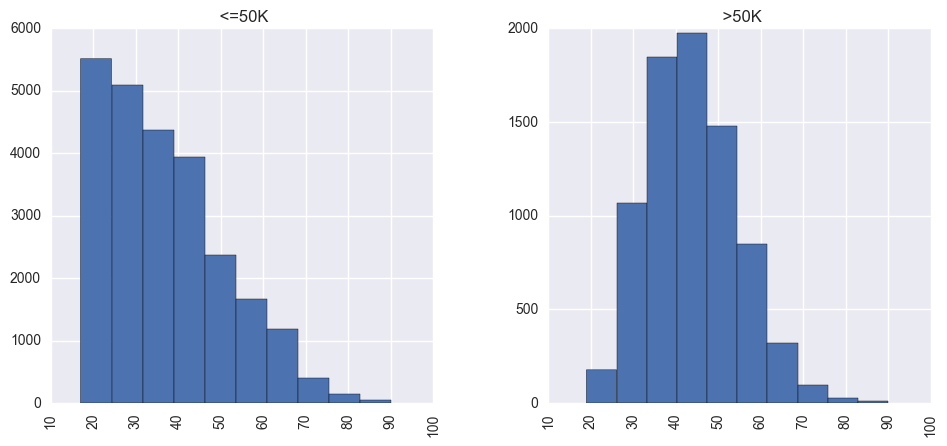

In [14]:
train.hist(column = 'age', by='class_label', figsize=(11,5), sharex=True)
plt.xlim(10,100)
plt.show()

>50K tends to be median around 45, compared to about 34 for <=50K

In [15]:
train.groupby('class_label')['age'].median()

class_label
 <=50K    34
 >50K     44
Name: age, dtype: int64

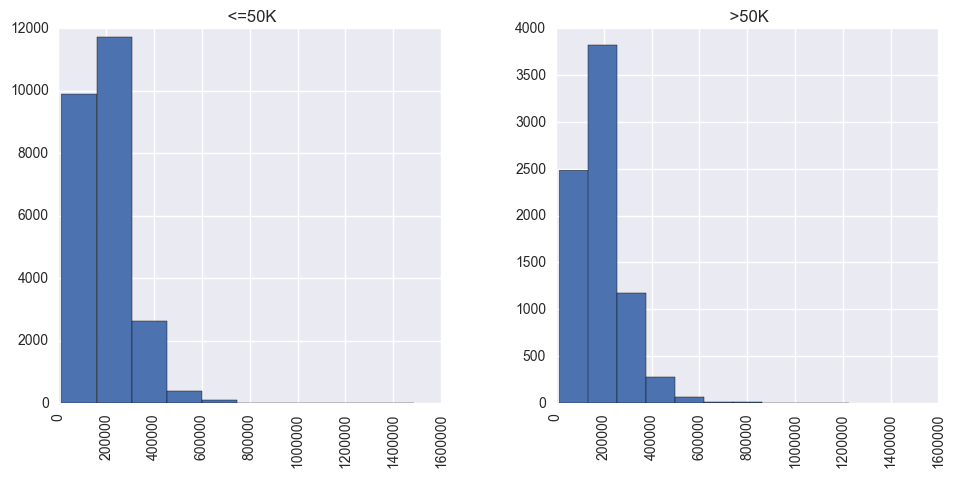

In [16]:
train.hist(column = 'fnlwgt', by='class_label', figsize=(11,5), sharex=True)
plt.show()

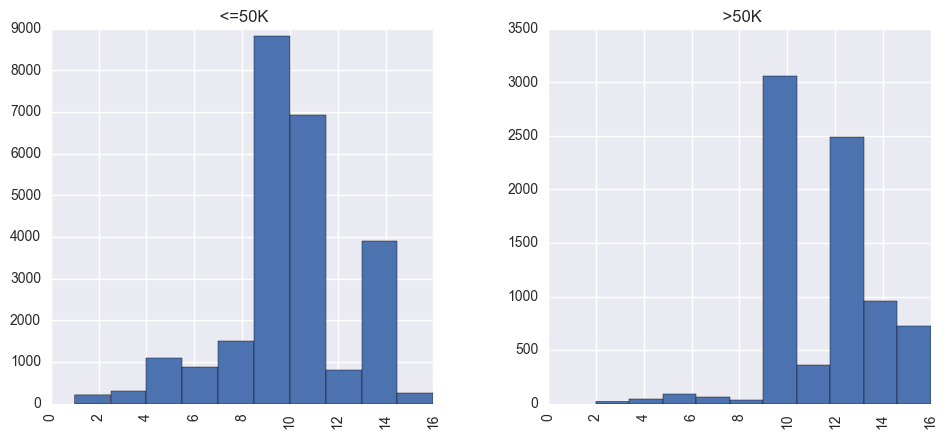

In [17]:
train.hist(column = 'education-num', by='class_label', figsize=(11,5), sharex=True)
plt.show()

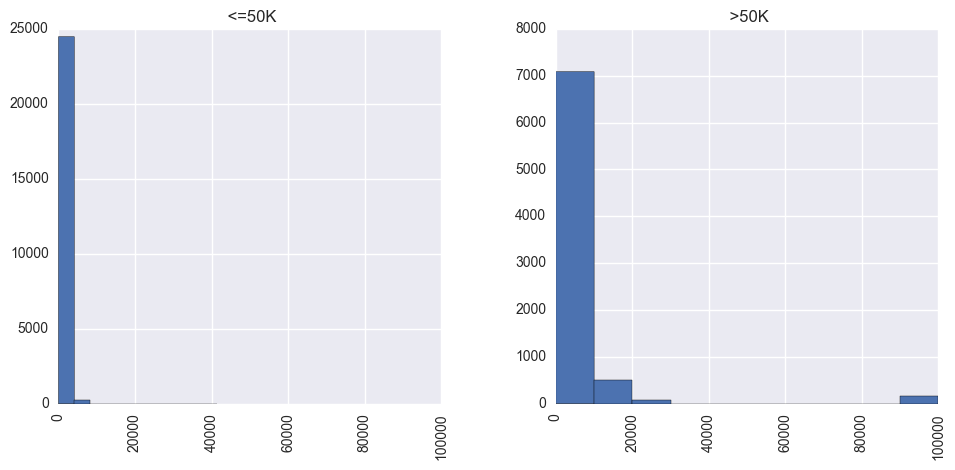

In [18]:
train.hist(column = 'capital-gain', by='class_label', figsize=(11,5), sharex=True)
plt.show()

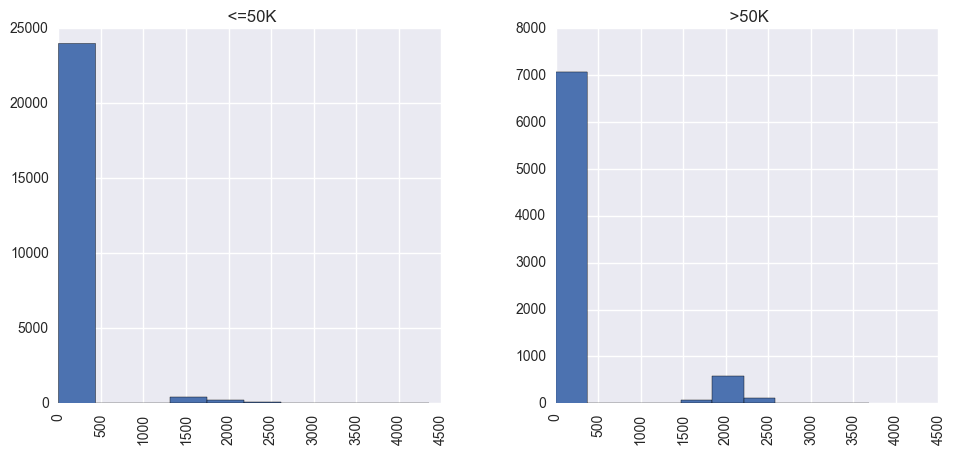

In [19]:
train.hist(column = 'capital-loss', by='class_label', figsize=(11,5), sharex=True)
plt.show()

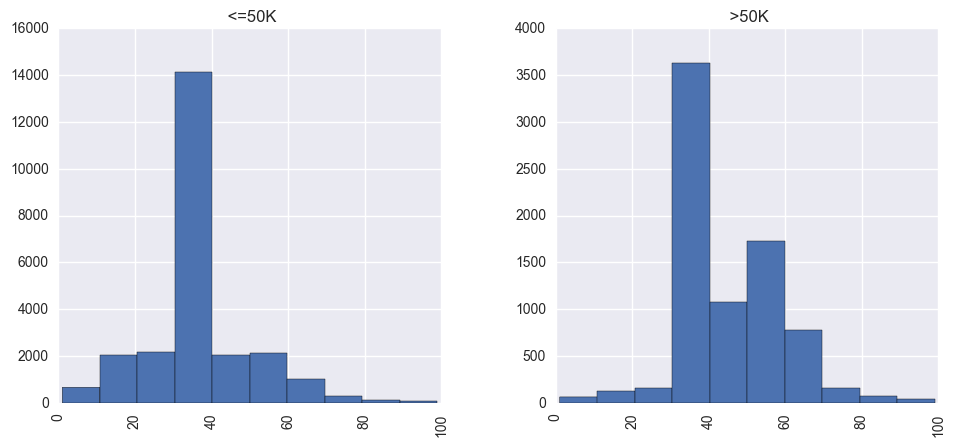

In [20]:
train.hist(column = 'hours-per-week', by='class_label', figsize=(11,5), sharex=True)
plt.show()

In [21]:
le = LabelEncoder()

In [22]:
train['class_num'] = le.fit_transform(train['class_label'])

In [23]:
num_train = train._get_numeric_data()

In [24]:
num_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class_num
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [25]:
corr_matrix = num_train.corr()

In [26]:
abs(corr_matrix['class_num']).sort_values(ascending = False) 

class_num         1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
capital-loss      0.150526
fnlwgt            0.009463
Name: class_num, dtype: float64

fnlwgt doesn't appear to be highly correlated.Might need to be scaled 

In [27]:
scaler = StandardScaler()

In [28]:
train['fnlwgt'] = scaler.fit_transform(train['fnlwgt'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [29]:
corr_matrix = num_train.corr()

In [30]:
abs(corr_matrix['class_num']).sort_values(ascending = False) 

class_num         1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
capital-loss      0.150526
fnlwgt            0.009463
Name: class_num, dtype: float64

Scaling it doesn't help

In [31]:
train.drop('fnlwgt', axis = 1 , inplace = True)

In [32]:
num_train.drop('fnlwgt', axis = 1 , inplace = True)

In [33]:
num_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class_num
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


## Non Numerical Data

In [34]:
obj_train = train.select_dtypes(include = ['object'])

In [35]:
obj_train.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class_label
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [36]:
obj_train['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Already has a numerical value. Can drop it from analysis. Might need to 1hot it later

In [37]:
obj_train.drop('education', axis =1, inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
obj_train.drop('class_label', axis =1, inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
obj_train['workclass'].value_counts() #can probably 1 hot this

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [40]:
obj_train.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [41]:
obj_1hot = pd.get_dummies(obj_train)

In [42]:
obj_1hot.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
obj_1hot.shape

(32561, 86)

In [44]:
num_train.shape

(32561, 6)

In [45]:
prep_train = pd.concat([num_train.reset_index(), obj_1hot.reset_index()], axis = 1)

In [46]:
prep_train.head()

,index,age,education-num,capital-gain,capital-loss,hours-per-week,class_num,index,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,50,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,38,9,0,0,40,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,53,7,0,0,40,0,3,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,28,13,0,0,40,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
prep_train.columns

Index(['index', 'age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'class_num', 'index', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupat

## Modelling

In [48]:
X_train = prep_train.drop('class_num', axis =1 )
y_train = prep_train['class_num']

### Logistic Regression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
lr_cv_score = cross_val_score(lr, X_train, y_train, cv = 3)
lr_cv_score

array([ 0.76764327,  0.84604754,  0.84575693])

### Decision Tree

In [52]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [54]:
dt_cv_score = cross_val_score(dt, X_train, y_train, cv = 3)
dt_cv_score

array([ 0.78422701,  0.82356735,  0.43739058])

### Random Forest

In [55]:
rf = RandomForestClassifier()

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
rf_cv_score = cross_val_score(rf, X_train, y_train, cv = 3)
rf_cv_score

array([ 0.81545974,  0.84973282,  0.70303142])

### KNN

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
knn_cv_score = cross_val_score(knn, X_train, y_train, cv = 3)
knn_cv_score

array([ 0.79390087,  0.51870278,  0.24601493])

### Naive Bayes

In [61]:
NB = GaussianNB()

In [62]:
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [63]:
NB_cv_score = cross_val_score(NB, X_train, y_train, cv = 3)
NB_cv_score

array([ 0.78984706,  0.81960568,  0.78448355])

### Nueral Net

In [72]:
NN = MLPClassifier(alpha=1)

In [73]:
NN.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [74]:
NN_cv_score = cross_val_score(NN, X_train, y_train, cv = 3)
NN_cv_score

array([ 0.61304588,  0.7850562 ,  0.77259744])

### AdaBoost

In [75]:
Boost = AdaBoostClassifier()

In [76]:
Boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [77]:
Boost_cv_score = cross_val_score(Boost, X_train, y_train, cv = 3)
Boost_cv_score

array([ 0.75916713,  0.86161784,  0.24085506])

In [78]:
model_rank = pd.DataFrame(
    {'Model' : ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes', 'Decision Tree','Nueral Net', 'AdaBoost' ]
        ,
     'CV Score': [np.mean(lr_cv_score),np.mean(rf_cv_score)
                  ,np.mean(knn_cv_score), np.mean(NB_cv_score), np.mean(dt_cv_score), np.mean(NN_cv_score), np.mean(Boost_cv_score) ]
     }    
)

In [79]:
model_rank.sort_values(by='CV Score', ascending = False)

,CV Score,Model
0,0.819816,Logistic Regression
3,0.797979,Naive Bayes
1,0.789408,Random Forest
5,0.723567,Nueral Net
4,0.681728,Decision Tree
6,0.620547,AdaBoost
2,0.519540,KNN


## Grid Search

In [80]:
lr_params_grid = [
    {'penalty': ['l1', 'l2'], 'C':[0.1,1.0,10.0]}
]

In [82]:
rf_params_grid = [
{'n_estimators':[3,10,30,300], 'max_features':[2,4,6,8], 'max_depth':[None, 1, 2], 'bootstrap':[False,True]}
]

In [83]:
NN_params_grid = [
    {'alpha':[0.0001, 0.001, 0.01, 0.1], }
]

In [84]:
lr_grid_search = GridSearchCV(lr, lr_params_grid, cv = 3, scoring = 'accuracy')

In [85]:
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [86]:
lr_grid_search.best_score_

0.85089524277509909

In [89]:
rf_grid_search = GridSearchCV(rf, rf_params_grid, cv = 3, scoring = 'accuracy')

In [90]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'bootstrap': [False, True], 'n_estimators': [3, 10, 30, 300], 'max_depth': [None, 1, 2], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [94]:
rf_grid_search.best_score_

0.81044808206136176

In [91]:
NN_grid_search = GridSearchCV(NN, NN_params_grid, cv = 3, scoring = 'accuracy')

In [92]:
NN_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [93]:
NN_grid_search.best_score_

0.72586837013605232

In [106]:
test['class_num'] = le.fit_transform(test['class_label'])

In [107]:
num_test = test._get_numeric_data()

In [108]:
num_test.drop('fnlwgt', axis = 1 , inplace = True)

In [109]:
obj_test = test.select_dtypes(include = ['object'])

In [110]:
test_1hot = pd.get_dummies(obj_test)

In [111]:
prep_test = pd.concat([num_train.reset_index(), obj_1hot.reset_index()], axis = 1)

In [112]:
X_test = prep_test.drop('class_num', axis =1 )
y_test = prep_test['class_num']

In [113]:
final_model = lr_grid_search.best_estimator_

In [114]:
predictions = final_model.predict(X_test)

In [118]:
accuracy_score(y_test, predictions)

0.85249224532416079

In [115]:
print(classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

             precision    recall  f1-score   support

      <=50K       0.88      0.93      0.91     24720
       >50K       0.74      0.61      0.66      7841

avg / total       0.85      0.85      0.85     32561



In [120]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[23014,  1706],
       [ 3097,  4744]])